# Momentum Strategy

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading in the data

In [517]:
product = "HL"

In [518]:
time_series = pd.read_csv(r'C:\Users\james\OneDrive\Documents\GitHub\jamsydLibrary\data\market_data\daily\stocks\BATS_EWI, 1D.csv',parse_dates=True,index_col='time')

# Trading Decision

### Create Moving Averages

In [519]:
# Calculate the EWMA with a span of 20
time_series['ema'] = time_series['close'].ewm(span=5, adjust=False).mean()
time_series['ema1'] = time_series['close'].ewm(span=18, adjust=False).mean()
time_series['ema2'] = time_series['close'].ewm(span=50, adjust=False).mean()

# Create our PnL vector
time_series['pnl'] = time_series['close'].diff(1)

### Create ATH Drawdown

In [520]:
ath_vector = []

i = 0
while i < len(time_series):
    ath_vector.append(time_series['close'].iloc[0:i].max())
    i+=1

time_series['ath'] = ath_vector
time_series['ath_drawdown'] = time_series['close']/time_series['ath']

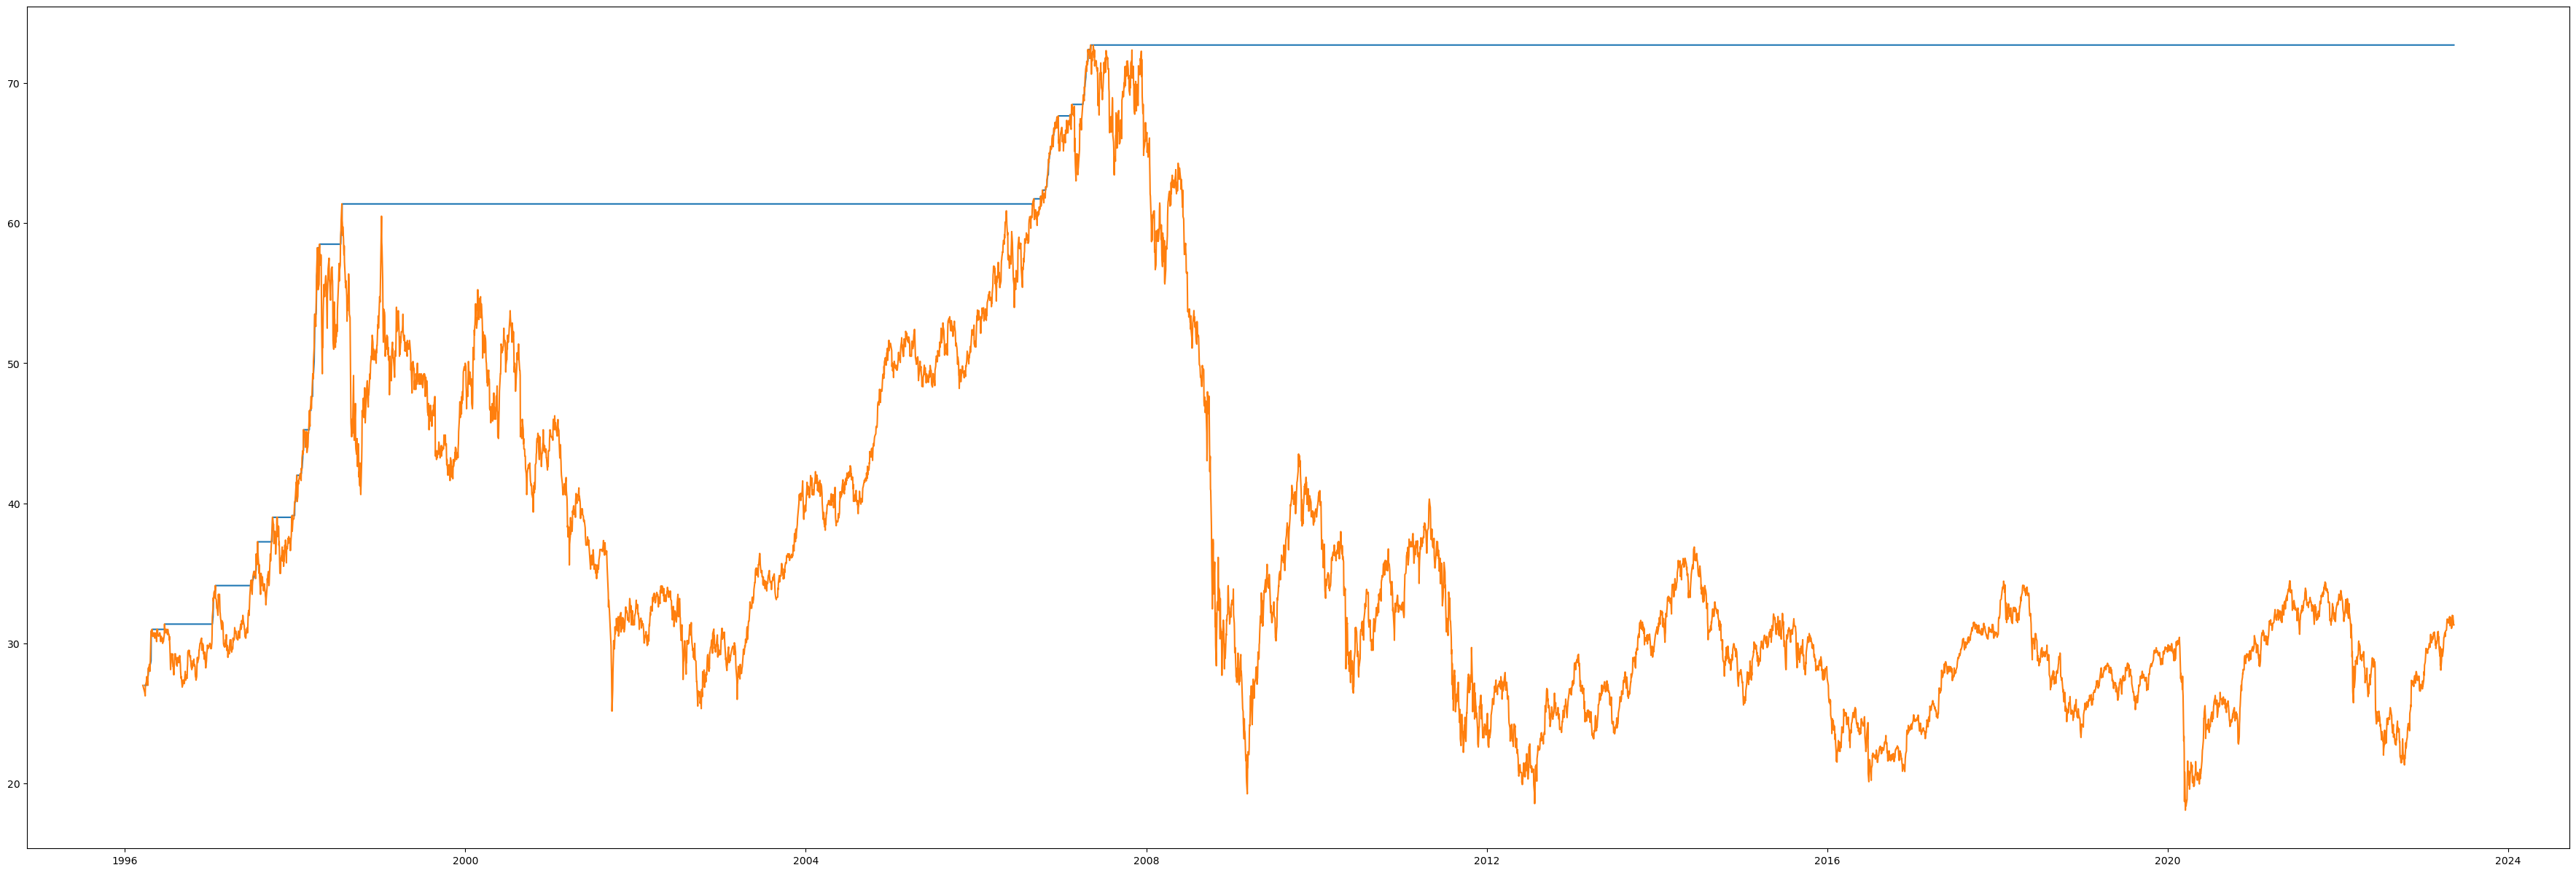

In [521]:
plt.figure(figsize=(45,15))
plt.plot(time_series['ath'])
plt.plot(time_series['close'])
plt.show()

# Create algo

In [537]:
import pandas as pd
import os
import glob
  
  
# use glob to get all the csv files 
# in the folder
path = r'C:\Users\james\OneDrive\Documents\GitHub\jamsydLibrary\approved_projects\interactive_brokers\Data\spy_tickers'
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
col_names = []
concat_df = []

# # loop over the list of csv files
# for f in csv_files:
      
#     # read the csv file
#     df = pd.read_csv(f,parse_dates=True,index_col='time')

#     col_names.append(f.split(r"""BATS_""")[-1].split(",")[0]+'_close')
#     # print(df)   
#     df.rename(columns = {'close': f.split(r"""BATS_""")[-1].split(",")[0] + '_close'},inplace=True)
#     # print(df[col_names[-1]])
#     concat_df.append(df[col_names[-1]])


In [538]:
csv_files

['C:\\Users\\james\\OneDrive\\Documents\\GitHub\\jamsydLibrary\\approved_projects\\interactive_brokers\\Data\\spy_tickers\\AAPL_historical_data.csv',
 'C:\\Users\\james\\OneDrive\\Documents\\GitHub\\jamsydLibrary\\approved_projects\\interactive_brokers\\Data\\spy_tickers\\AA_historical_data.csv',
 'C:\\Users\\james\\OneDrive\\Documents\\GitHub\\jamsydLibrary\\approved_projects\\interactive_brokers\\Data\\spy_tickers\\ABT_historical_data.csv',
 'C:\\Users\\james\\OneDrive\\Documents\\GitHub\\jamsydLibrary\\approved_projects\\interactive_brokers\\Data\\spy_tickers\\ACE_historical_data.csv',
 'C:\\Users\\james\\OneDrive\\Documents\\GitHub\\jamsydLibrary\\approved_projects\\interactive_brokers\\Data\\spy_tickers\\ACN_historical_data.csv',
 'C:\\Users\\james\\OneDrive\\Documents\\GitHub\\jamsydLibrary\\approved_projects\\interactive_brokers\\Data\\spy_tickers\\ADBE_historical_data.csv',
 'C:\\Users\\james\\OneDrive\\Documents\\GitHub\\jamsydLibrary\\approved_projects\\interactive_brokers\\D

In [524]:


time_series = pd.read_csv(r'C:\Users\james\OneDrive\Documents\GitHub\jamsydLibrary\data\market_data\daily\stocks\BATS_EWI, 1D.csv',parse_dates=True,index_col='time')

# Calculate the EWMA with a span of 20
time_series['ema'] = time_series['close'].ewm(span=5, adjust=False).mean()
time_series['ema1'] = time_series['close'].ewm(span=18, adjust=False).mean()
time_series['ema2'] = time_series['close'].ewm(span=50, adjust=False).mean()

# Create our PnL vector
time_series['pnl'] = time_series['close'].diff(1)

ath_vector = []

i = 0
while i < len(time_series):
    ath_vector.append(time_series['close'].iloc[0:i].max())
    i+=1

time_series['ath'] = ath_vector
time_series['ath_drawdown'] = time_series['close']/time_series['ath']

time_series['position'] = np.where((time_series['ema'] > time_series['ema1']) & 
                                 (time_series['ema1'] > time_series['ema2']) & (time_series['ath_drawdown'] > 0.9), 1, 
                                 np.where((time_series['ema'] < time_series['ema1']) & 
                                          (time_series['ema1'] < time_series['ema2']) & (time_series['ath_drawdown'] < 0.7) & (time_series['ath_drawdown'] > 0.3), -1, 0))

# Create a position identifier
i               = 0
vector          = []
position_size   = []
entry_price     = []
initial_capital = 100000
while i < len(time_series):

    if time_series['position'][i] == 0:
        vector.append(0)
        position_size.append(0)
        entry_price.append(0)

        i += 1  # Move to the next index
    else:
        # Start j = 0 so that we only account for pnl once position is taken
        j = 1
        vector.append(0)
        position_size.append(0)
        entry_price.append(time_series['close'][i])
        position_identifier = f"{product}_{i}"
        while i + j < len(time_series) and time_series['position'][i + j] == 1:
            if j == 0:
                size = np.floor(initial_capital/time_series['close'][i])
            entry_price.append(time_series['close'][i])
            vector.append(position_identifier)
            position_size.append(size)
            j += 1

        i = j + i

time_series['vector']        = vector
time_series['position_size'] = position_size
time_series['entry_price']   = entry_price

# Create PnL Vector
time_series['pnl_vector'] = time_series['pnl']*time_series['position']*time_series['position_size']

C:\Users\james\AppData\Local\Temp\ipykernel_19388\2267666862.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if time_series['position'][i] == 0:
C:\Users\james\AppData\Local\Temp\ipykernel_19388\2267666862.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  entry_price.append(time_series['close'][i])
C:\Users\james\AppData\Local\Temp\ipykernel_19388\2267666862.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while i + j < l

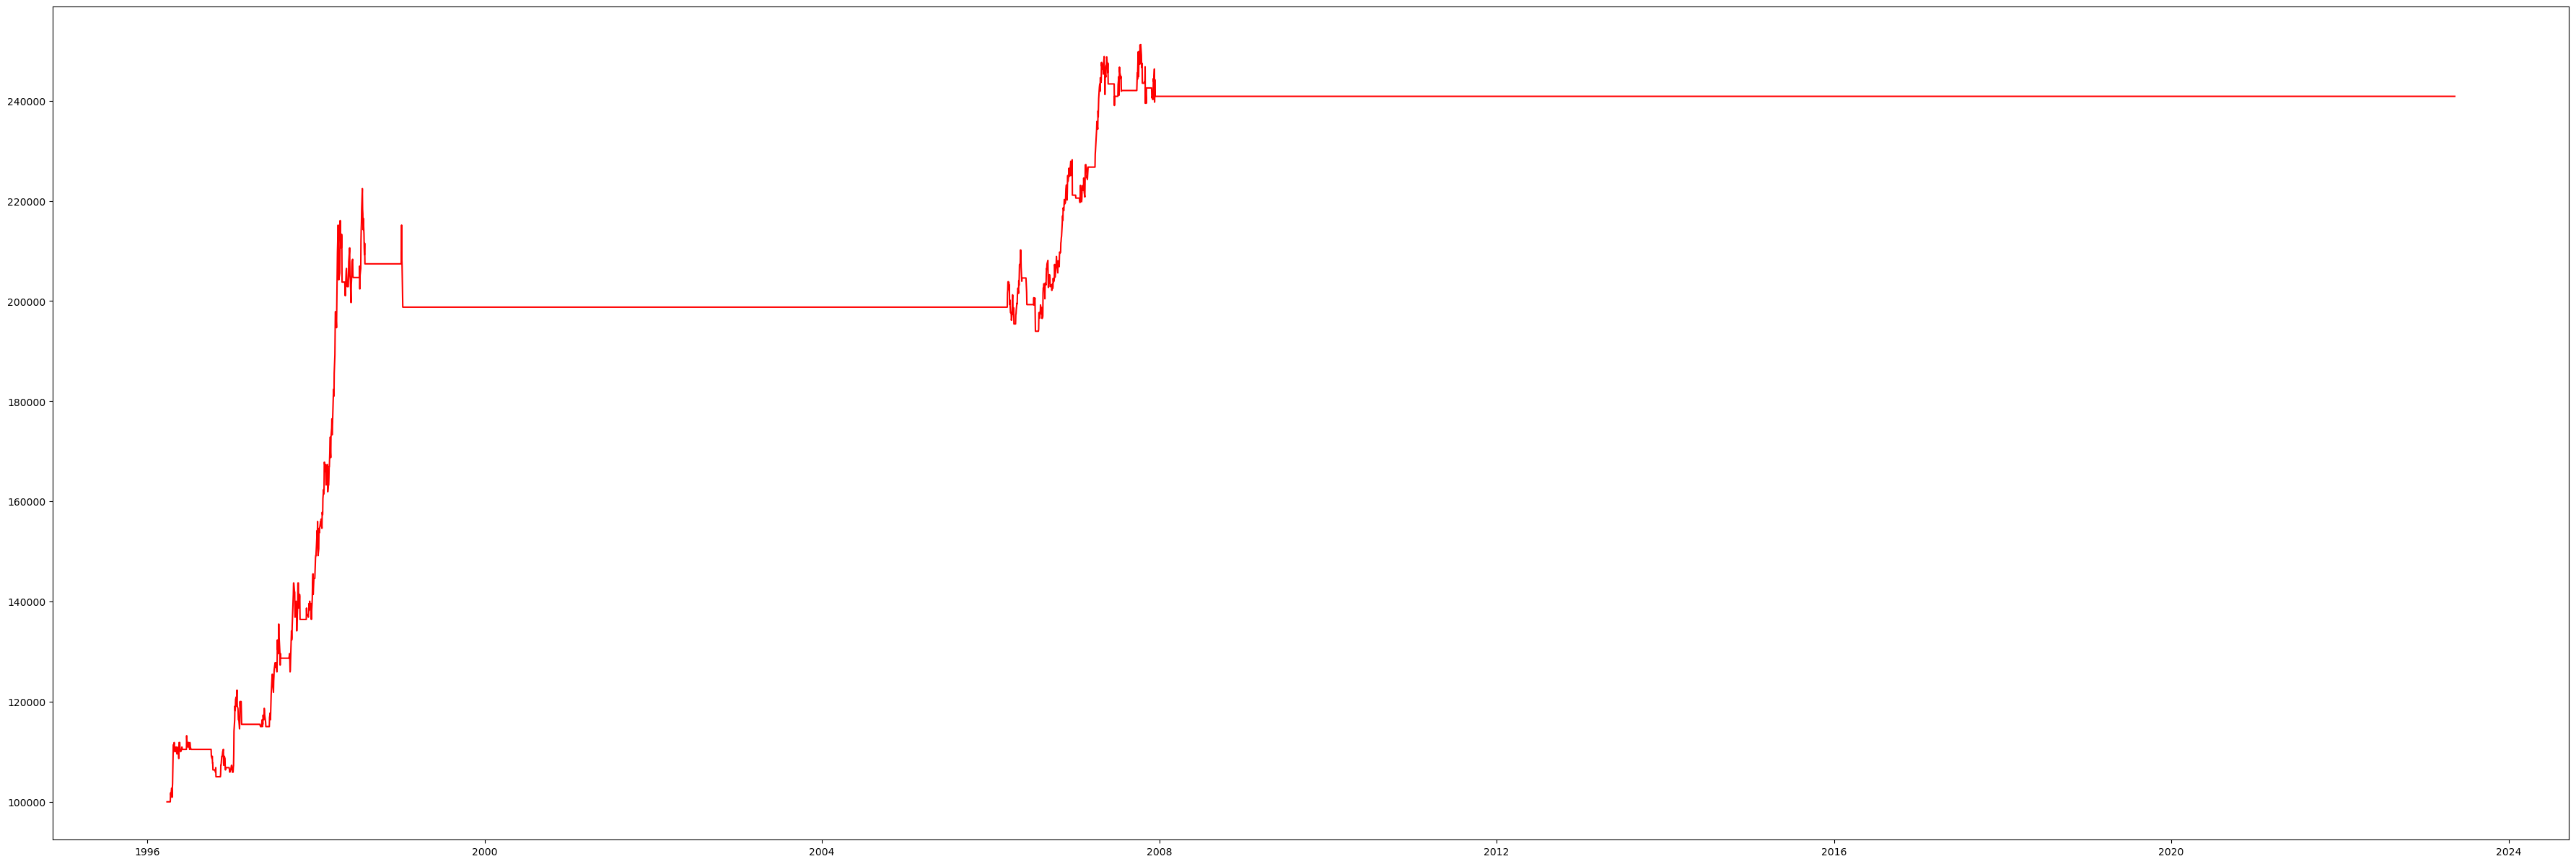

In [525]:
plt.figure(figsize=(45, 15))
plt.plot(initial_capital + time_series['pnl_vector'].cumsum(),color='red')
plt.show()

# Position Analytics


In [526]:
trade_summary = time_series.copy()

position_dict = {'position_id':[],
                 'return':[],
                 'std':[],
                 'days_in_trade':[]}

for position_id in trade_summary['vector'].unique()[1:]:
    position_dict['position_id'].append(position_id)
    position_dict['return'].append(trade_summary[trade_summary['vector'] == position_id]['pnl'].sum()/trade_summary[trade_summary['vector'] == position_id]['entry_price'][0]*100)
    position_dict['std'].append(np.std(trade_summary[trade_summary['vector'] == position_id]['pnl']/trade_summary[trade_summary['vector'] == position_id]['entry_price'][0]))
    position_dict['days_in_trade'].append(len(trade_summary[trade_summary['vector'] == position_id]))

position_df = pd.DataFrame(position_dict)

position_df['return_per_day'] = position_df['return']/position_df['days_in_trade']
position_df['standardized_return_per_day'] = position_df['return']/position_df['std']/position_df['days_in_trade']

C:\Users\james\AppData\Local\Temp\ipykernel_19388\3251548856.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  position_dict['return'].append(trade_summary[trade_summary['vector'] == position_id]['pnl'].sum()/trade_summary[trade_summary['vector'] == position_id]['entry_price'][0]*100)
C:\Users\james\AppData\Local\Temp\ipykernel_19388\3251548856.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  position_dict['std'].append(np.std(trade_summary[trade_summary['vector'] == position_id]['pnl']/trade_summary[trade_summary['vector'] == position_id]['entry_price'][0]))


### Return per day

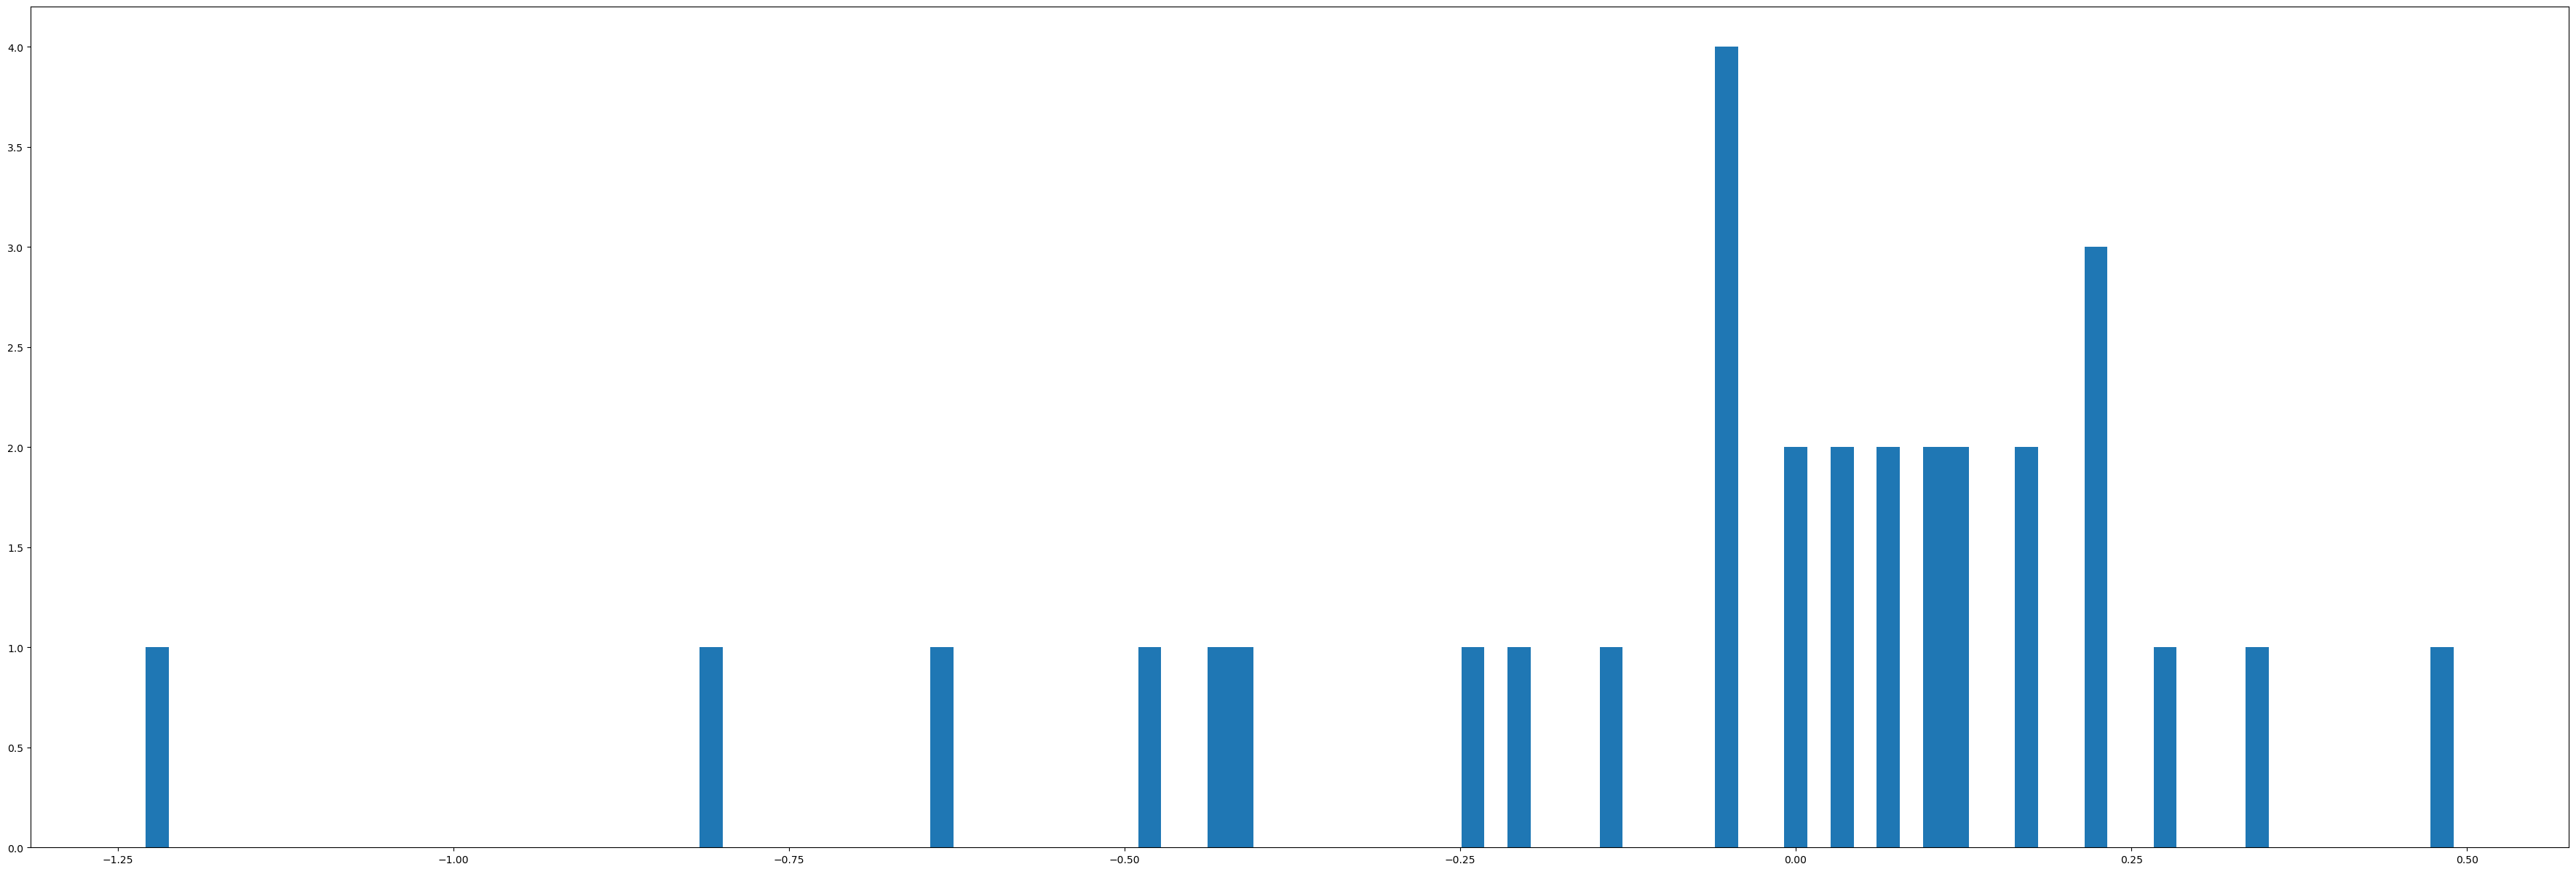

In [527]:
plt.figure(figsize=(45,15))
plt.hist(position_df[(position_df['return_per_day'] != np.inf) & (position_df['return_per_day'] != -np.inf)]['return_per_day'],bins=100)
plt.show()

### Return per trade

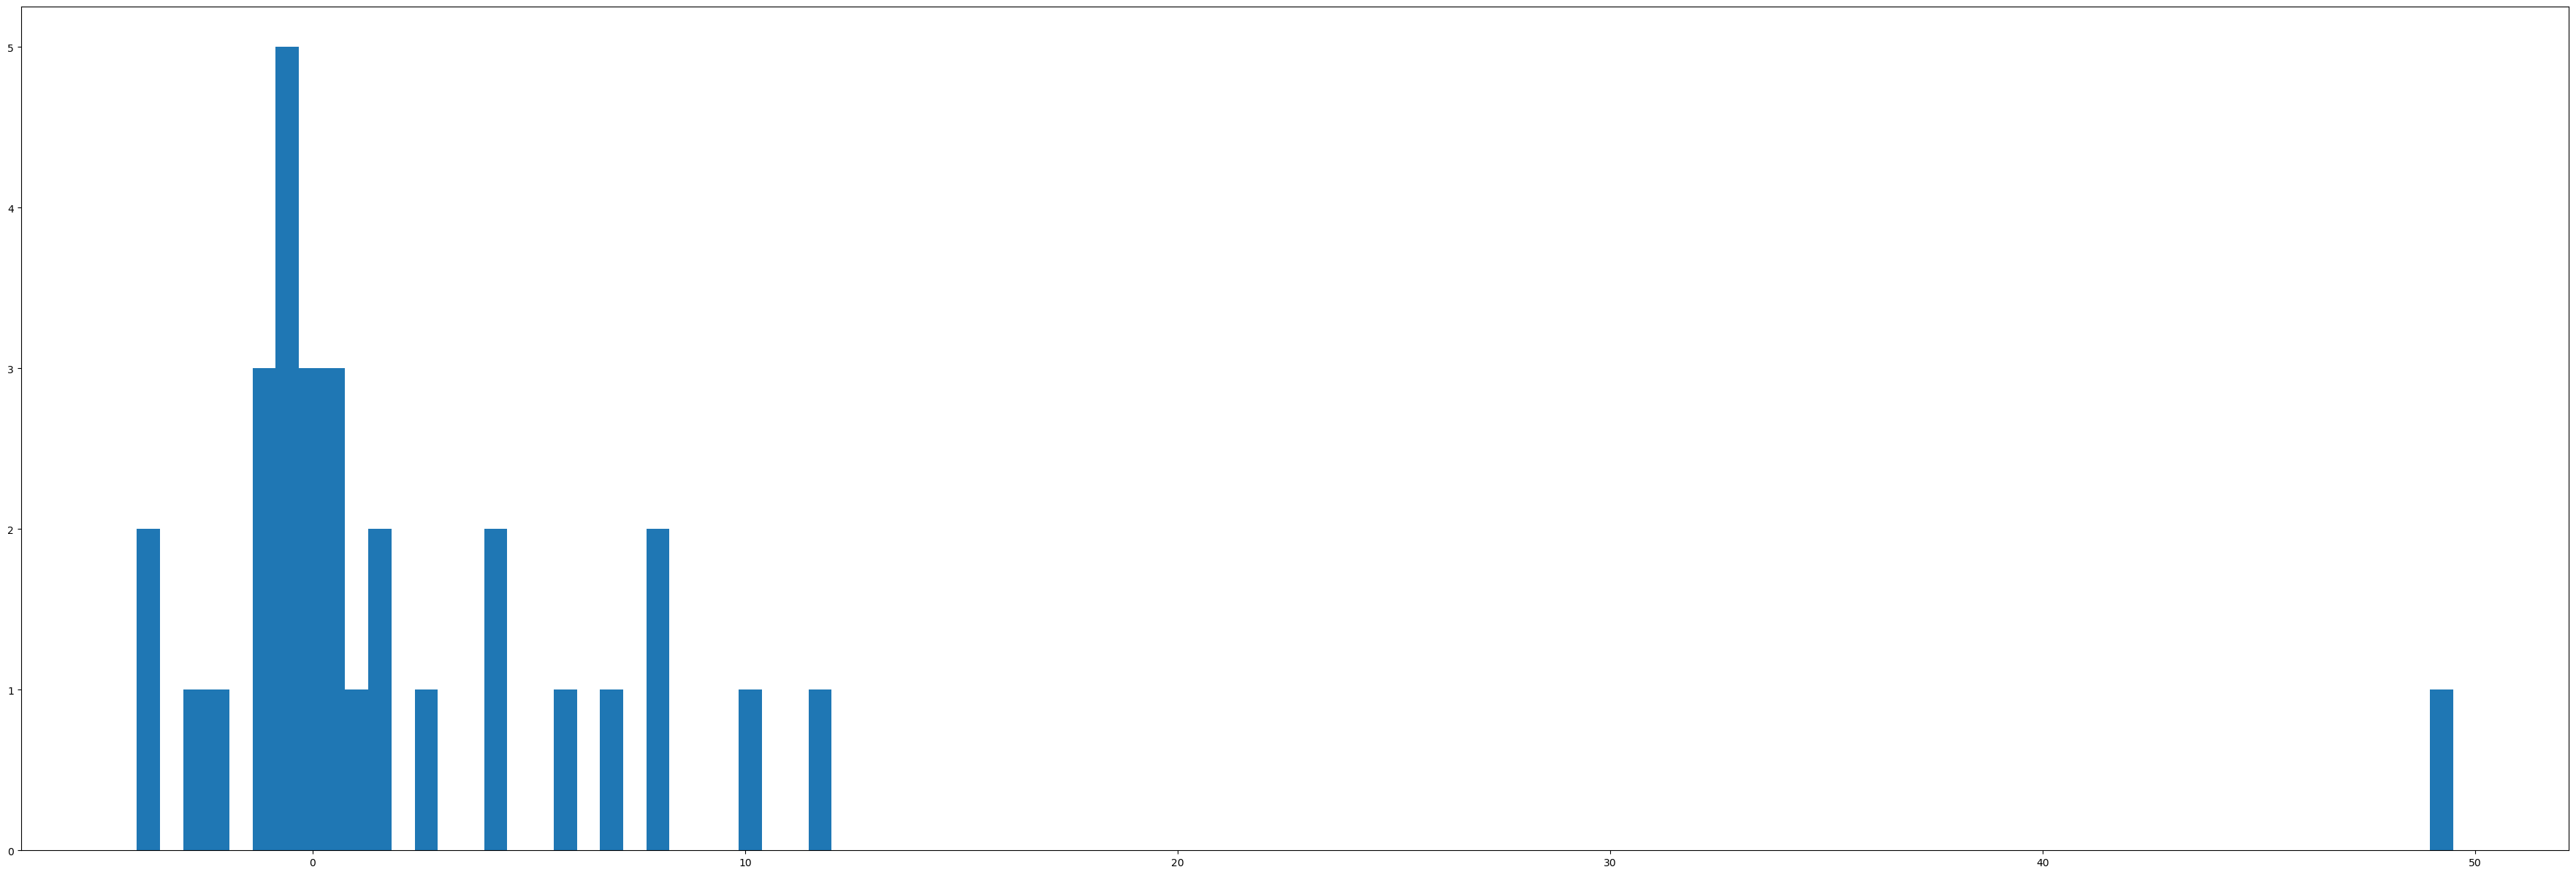

In [528]:
plt.figure(figsize=(45,15))
plt.hist(position_df[(position_df['return'] != np.inf) & (position_df['return'] != -np.inf)]['return'],bins=100)
plt.show()

# Standardized Return Per Trade

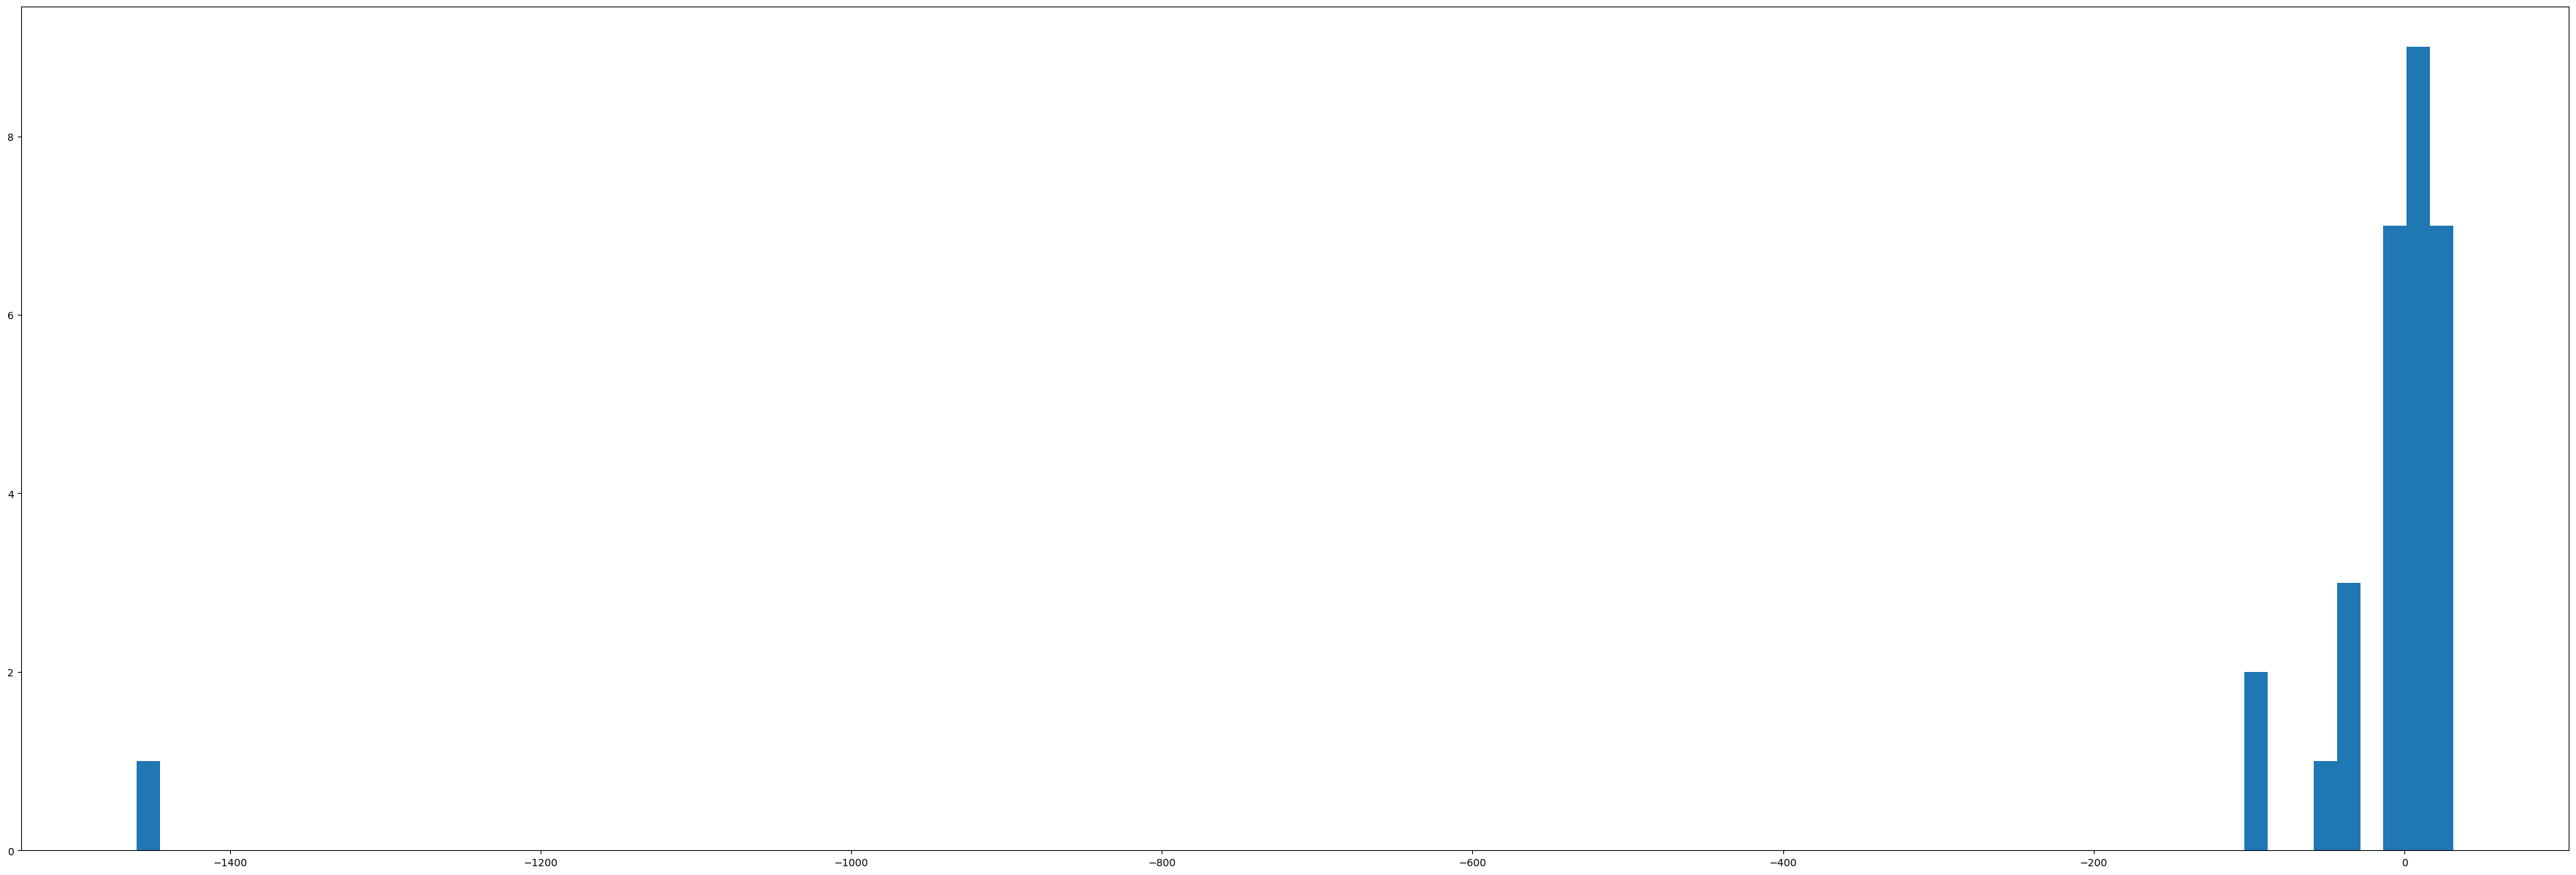

In [535]:
plt.figure(figsize=(45,15))
plt.hist(position_df[(position_df['standardized_return_per_day'] != np.inf) & (position_df['standardized_return_per_day'] != -np.inf)]['standardized_return_per_day'],bins=100)
plt.show()

### Days in trade

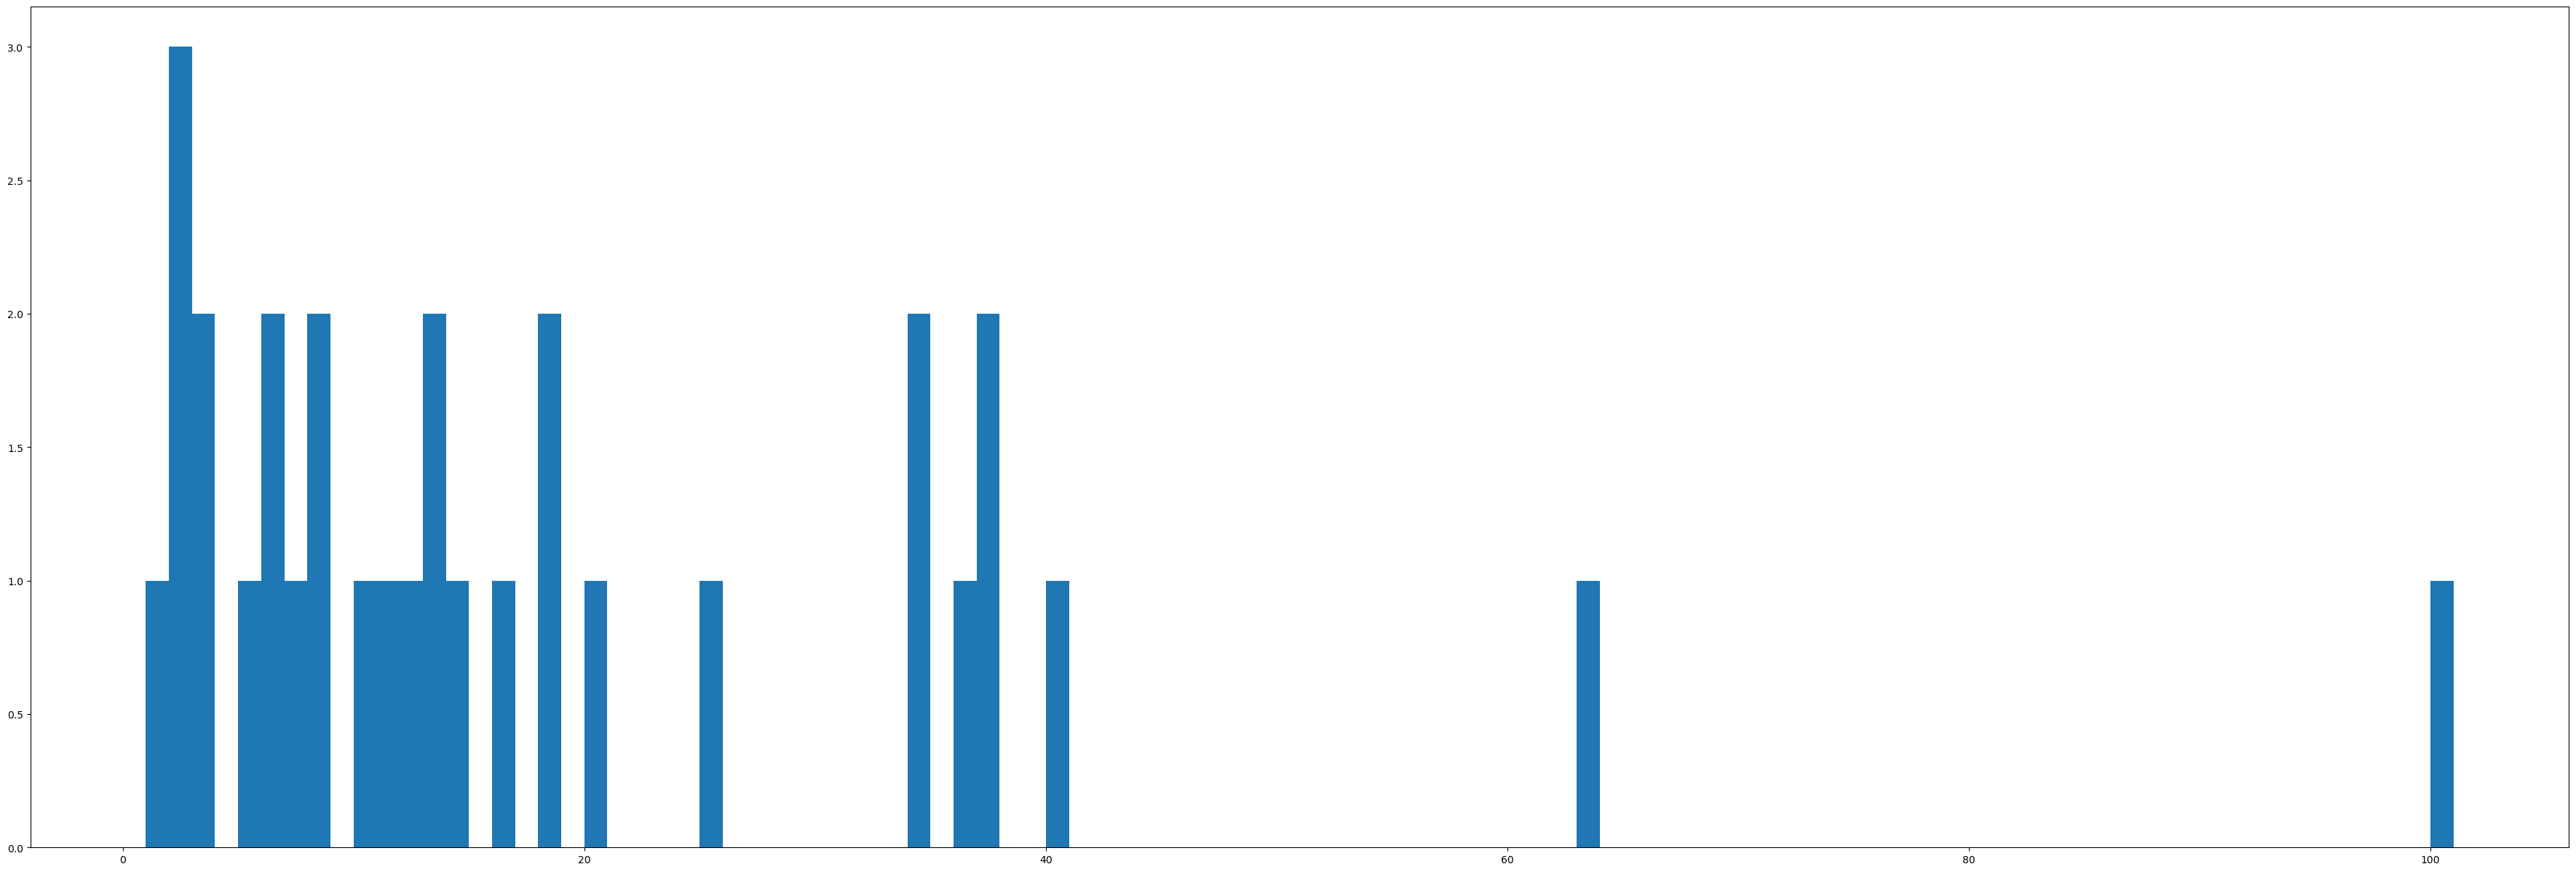

In [529]:
plt.figure(figsize=(45,15))
plt.hist(position_df['days_in_trade'],bins=100)
plt.show()

# Drawdown Analytics

In [530]:
def rolling_max_drawdown(series, window=252):
    """
    Calculate the rolling maximum drawdown for a given series and window.
    """
    roll_max = series.rolling(window, min_periods=1).max()
    drawdown = series / roll_max - 1.0
    max_drawdown = drawdown.rolling(window, min_periods=1).min()

    return max_drawdown


In [531]:
# Assuming your DataFrame is named time_series and has the column 'close'
time_series['rolling_max_drawdown'] = rolling_max_drawdown(initial_capital + time_series['pnl_vector'].cumsum(), window=252)

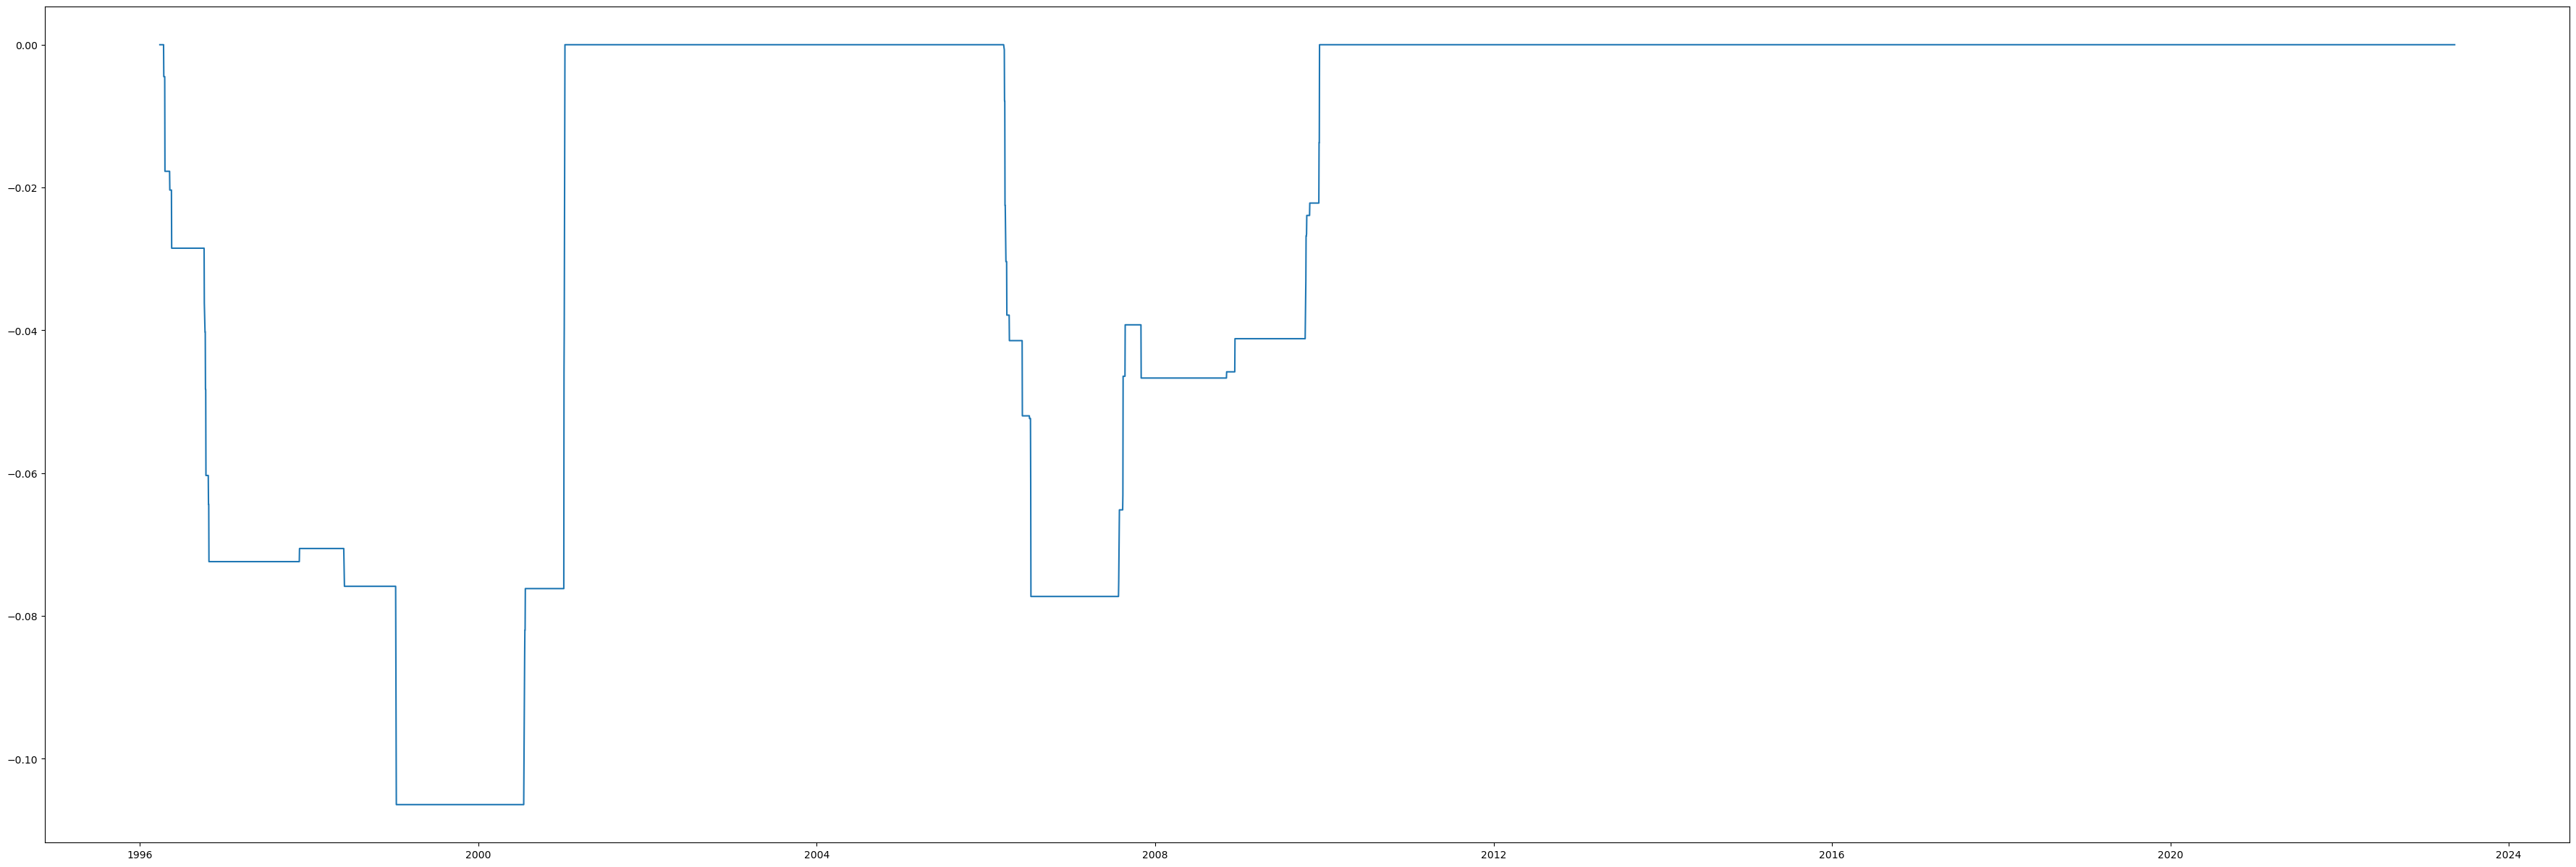

In [532]:
plt.figure(figsize=(45, 15))
plt.plot(time_series['rolling_max_drawdown'])
plt.show()

# Sharpe Analytics

In [533]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Load your trading strategy returns
# Replace 'your_returns.csv' with the actual file containing your returns data
# The returns should be in a column named 'returns'
# data = pd.read_csv('your_returns.csv')

returns = time_series[time_series['pnl_vector'] !=0]['pnl_vector']

# Calculate the Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate=0.05):
    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns)

# Calculate the Maximum Drawdown
def max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Calculate Skewness
def skewness(returns):
    return stats.skew(returns)

# Calculate Kurtosis
def kurtosis(returns):
    return stats.kurtosis(returns)

# Calculate Left Tail Fatness (probability of extreme negative returns)
def left_tail_fatness(returns, threshold=-0.05):
    return np.sum(returns < threshold) / len(returns)

# Calculate Right Tail Fatness (probability of extreme positive returns)
def right_tail_fatness(returns, threshold=0.05):
    return np.sum(returns > threshold) / len(returns)

# Calculate metrics
sharpe = sharpe_ratio(returns)
max_dd = max_drawdown(returns)
skew = skewness(returns)
kurt = kurtosis(returns)
left_tail = left_tail_fatness(returns)
right_tail = right_tail_fatness(returns)

# Print metrics
print(f'Sharpe Ratio: {sharpe:.2f}')
print(f'Maximum Drawdown: {max_dd:.2%}')
print(f'Skewness: {skew:.2f}')
print(f'Kurtosis: {kurt:.2f}')
print(f'Left Tail Fatness (returns < -5%): {left_tail:.2%}')
print(f'Right Tail Fatness (returns > 5%): {right_tail:.2%}')


Sharpe Ratio: 0.11
Maximum Drawdown: -800416465733044352.00%
Skewness: nan
Kurtosis: nan
Left Tail Fatness (returns < -5%): 43.49%
Right Tail Fatness (returns > 5%): 56.33%


c:\Users\james\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


In [534]:
# Probability of success
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load your dataset
# For example, using a CSV file
# Replace 'your_dataset.csv' with your actual dataset file
data = pd.read_csv('your_dataset.csv')

# Assume the target variable is named 'target'
# and all other columns are features
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names


SyntaxError: incomplete input (2381515181.py, line 42)